# 🛠️ Configuración Global y Conectividad API

Este bloque centraliza los parámetros de configuración del entorno de trabajo, asegurando la portabilidad del código y la gestión de recursos externos para la ingesta de datos.

---

## 1. 🔑 Autenticación con Materials Project (MP API)
La variable `MATERIALS_PROJECT_API_KEY` es la credencial necesaria para interactuar con la **API de Materials Project**.
* **Propósito:** Permite realizar consultas programáticas a una base de datos de miles de compuestos, extrayendo propiedades calculadas mediante **Teoría del Funcional de la Densidad (DFT)**, como el *Band Gap*, la *Energía de Formación* y la *Estructura Cristalina*.
* **Seguridad de Datos:** Centralizar la clave en un archivo de configuración facilita su rotación y evita la exposición de credenciales dentro del código lógico de análisis.



---

## 2. 📁 Gestión de Persistencia (Paths)
Se definen las rutas de salida para los activos generados por el pipeline de Ciencia de Datos:
* **`DATASET_PATH`:** Puntero al dataset maestro enriquecido con todas las características avanzadas y predicciones. Es la "Verdad de Terreno" para análisis futuros.
* **`TOP_CANDIDATOS_PATH`:** Archivo optimizado que contiene exclusivamente la selección de élite para el equipo de experimentación.

---

## 3. 🏗️ Arquitectura de Directorios
Al definir estas constantes al inicio del proyecto, garantizamos que el pipeline de **Ingeniería de Materiales** sea:
1.  **Reproducible:** Cualquier otro investigador puede ejecutar el código simplemente ajustando su propia API Key.
2.  **Escalable:** Facilita la migración de un entorno de desarrollo local a un entorno de producción o computación en la nube (HPC).

> **Nota Técnica:** El uso de constantes en un archivo de configuración es una "Best Practice" de Ingeniería de Software que separa los **datos de configuración** de la **lógica del modelo**, reduciendo errores durante la actualización de los conjuntos de datos.

---

In [2]:
# config.py
MATERIALS_PROJECT_API_KEY = "nhKTNXY1rf67sjj4QbGJ96ipOpMGrFBu"  # Consíguela en: materialsproject.org
DATASET_PATH = "/content/perovskitas_optimizadas_r2_alto.csv"
TOP_CANDIDATOS_PATH = "/content/top_candidatos_r2_alto.csv"

In [3]:
# Instala las dependencias necesarias
!pip install pymatgen torch torch-geometric scikit-learn xgboost pandas numpy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.4 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.4-py3-none-any.whl size=43609 sha256=ac10c273c6cba85eda37577c954b3992f9e3fd55d2c40bc69b3bc020b2b9b7ce
  Stored in directory: /root/.cache/pip/wheels/54/f8/e6/ecfceb6af875ddc5096bb3811795

In [4]:
# Instala la nueva API de Materials Project
!pip install mp-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.8/308.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 26.1 MB/s eta 0:00:00


# 📥 Adquisición de Estructuras Cristalinas y Datos Atómicos

En esta fase, el pipeline se conecta con la base de datos de **Materials Project** mediante la librería `pymatgen` para descargar los archivos de estructura (celdas unitarias) de los candidatos identificados. Este paso es fundamental para futuras simulaciones de dinámica molecular o cálculos de primeros principios.

---

## 1. 🌐 Interacción con MPRester
Utilizamos el objeto `MPRester` como interfaz de comunicación con la API de Materials Project.
* **get_structure_by_material_id:** Descarga la geometría tridimensional del cristal, incluyendo las posiciones atómicas $(x, y, z)$ y los vectores de la red.
* **get_doc:** Recupera metadatos adicionales calculados mediante DFT, como el grupo espacial (*spacegroup*), que define la simetría del cristal.



---

## 2. 🛡️ Estrategia de Robustez y Tolerancia a Fallos
Dada la naturaleza de las consultas a APIs externas, el script implementa un sistema de redundancia de tres niveles:
1. **Nivel Óptimo:** Descarga la estructura completa y metadatos actualizados directamente de la nube.
2. **Nivel de Respaldo (Try-Except):** Si la API falla parcialmente, el script combina la estructura atómica con los datos físicos que ya poseemos en nuestro archivo `top_candidatos_r2_alto.csv`.
3. **Nivel de Emergencia (`obtener_estructuras_simple`):** Si no hay conexión a internet o la API está caída, genera un registro JSON con datos locales para no detener el flujo de trabajo del ingeniero.

---

## 3. 💾 Serialización en Formato JSON
Los datos se almacenan en `estructuras_materiales.json`. A diferencia de un CSV, el formato JSON permite guardar estructuras anidadas complejas:
* **As Dict:** La estructura de `pymatgen` se convierte en un diccionario serializable que preserva toda la información cristalográfica.
* **Normalización:** Se asegura de que todos los valores numéricos sean tipos `float` estándar de Python para evitar errores de compatibilidad con la librería `json`.

---

## 4. ⚖️ Respeto a Límites de Tasa (Rate Limiting)
Se incluye un `time.sleep(0.5)` entre cada consulta. Esto evita que los servidores de Materials Project bloqueen nuestra IP por exceso de peticiones, garantizando una descarga estable y ética de los datos.

> **Salida del Proceso:** El archivo resultante contiene un diccionario donde cada llave es un `Material_ID`, permitiendo un acceso instantáneo a la geometría del cristal para visualizaciones o simulaciones térmicas y electrónicas.

In [6]:
# 2_obtener_estructuras_FINAL.py
import pandas as pd
from pymatgen.ext.matproj import MPRester
import json
import time
import numpy as np


def obtener_estructuras_materiales_final():
    """Obtiene estructuras atómicas de Materials Project (versión compatible JSON)"""

    # Cargar tus candidatos
    df_top = pd.read_csv("/content/top_candidatos_r2_alto.csv")
    materiales_ids = df_top['Material_ID'].tolist()

    print(f"📥 Obteniendo estructuras para {len(materiales_ids)} materiales...")

    estructuras = {}

    # Usar la API vieja (más estable)
    with MPRester('nhKTNXY1rf67sjj4QbGJ96ipOpMGrFBu') as mpr:
        for i, material_id in enumerate(materiales_ids, 1):
            try:
                print(f"  [{i}/{len(materiales_ids)}] Obteniendo {material_id}...")

                # Obtener estructura
                structure = mpr.get_structure_by_material_id(material_id)

                # Obtener datos del material
                # Primero intentar obtener datos completos
                try:
                    # Para la API vieja, obtener datos básicos
                    data = mpr.get_doc(material_id)

                    # Extraer propiedades
                    formation_energy = data.get('formation_energy_per_atom', None)
                    band_gap = data.get('band_gap', None)
                    density = data.get('density', None)
                    volume = data.get('volume', None)
                    spacegroup = data.get('spacegroup', {}).get('symbol', None)

                except:
                    # Si falla, usar datos de tu CSV
                    df_row = df_top[df_top['Material_ID'] == material_id]

                    formation_energy = df_row['Energia_Formacion_eatoms'].iloc[0] if not df_row.empty else None
                    band_gap = df_row['Band_Gap_eV'].iloc[0] if not df_row.empty else None
                    density = df_row['Densidad_g_cm3'].iloc[0] if not df_row.empty else None
                    volume = structure.volume
                    spacegroup = None

                # Preparar datos JSON serializables
                estructuras[material_id] = {
                    'structure': structure.as_dict(),
                    'formula': structure.formula,
                    'formation_energy': float(formation_energy) if formation_energy is not None else None,
                    'band_gap': float(band_gap) if band_gap is not None else None,
                    'density': float(density) if density is not None else None,
                    'spacegroup': str(spacegroup) if spacegroup else None,
                    'volume': float(volume) if volume else structure.volume,
                    'num_sites': len(structure),
                    'elements': [str(e) for e in structure.composition.elements]
                }

                print(f"    ✅ Obtenido: {structure.formula}")

                time.sleep(0.5)  # Respetar límites de la API

            except Exception as e:
                print(f"    ❌ Error con {material_id}: {str(e)[:80]}...")

                # Intentar obtener solo la estructura (mínimo)
                try:
                    structure = mpr.get_structure_by_material_id(material_id)
                    df_row = df_top[df_top['Material_ID'] == material_id]

                    estructuras[material_id] = {
                        'structure': structure.as_dict(),
                        'formula': structure.formula,
                        'formation_energy': df_row['Energia_Formacion_eatoms'].iloc[0] if not df_row.empty else None,
                        'band_gap': df_row['Band_Gap_eV'].iloc[0] if not df_row.empty else None,
                        'density': df_row['Densidad_g_cm3'].iloc[0] if not df_row.empty else None,
                        'spacegroup': None,
                        'volume': structure.volume,
                        'num_sites': len(structure),
                        'elements': [str(e) for e in structure.composition.elements],
                        'warning': f"Partial data: {str(e)[:50]}"
                    }
                    print(f"    ⚠️  Datos parciales obtenidos")

                except Exception as e2:
                    print(f"    💥 Error grave: {str(e2)[:80]}...")
                    estructuras[material_id] = {
                        'error': str(e),
                        'error_detail': str(e2)[:100]
                    }

    # Guardar resultados
    with open('estructuras_materiales.json', 'w') as f:
        json.dump(estructuras, f, indent=2, default=str)  # default=str para manejar objetos

    print(f"\n✅ Estructuras guardadas en 'estructuras_materiales.json'")

    # Estadísticas
    exitosos = sum(1 for v in estructuras.values() if 'error' not in v and 'warning' not in v)
    parciales = sum(1 for v in estructuras.values() if 'warning' in v)
    errores = sum(1 for v in estructuras.values() if 'error' in v)

    print(f"📊 Resumen: {exitosos} completos, {parciales} parciales, {errores} errores")

    return estructuras

# Versión alternativa SIMPLE si la API falla completamente
def obtener_estructuras_simple():
    """Versión simple que usa solo datos locales"""

    df_top = pd.read_csv("top_candidatos_r2_alto.csv")

    print("🔄 Usando datos locales (sin conexión a MP)...")

    estructuras = {}

    for _, row in df_top.iterrows():
        material_id = row['Material_ID']
        formula = row['Formula']

        # Crear estructura básica simbólica
        # En lugar de estructura real, guardamos solo los datos
        estructuras[material_id] = {
            'formula': formula,
            'formation_energy': float(row['Energia_Formacion_eatoms']),
            'band_gap': float(row['Band_Gap_eV']),
            'density': float(row['Densidad_g_cm3']),
            'spacegroup': None,
            'volume': 100.0,  # Valor por defecto
            'num_sites': 10,  # Valor por defecto
            'elements': extraer_elementos(formula),
            'warning': 'Estructura simulada - Sin conexión a MP',
            'structure_simulated': True
        }

    with open('estructuras_materiales.json', 'w') as f:
        json.dump(estructuras, f, indent=2)

    print(f"✅ Datos locales guardados en 'estructuras_materiales.json'")
    return estructuras

def extraer_elementos(formula):
    """Extrae elementos de una fórmula química"""
    import re
    elementos = re.findall(r'[A-Z][a-z]*', formula)
    return list(set(elementos))

if __name__ == "__main__":
    try:
        estructuras = obtener_estructuras_materiales_final()
    except Exception as e:
        print(f"⚠️  Error con API: {e}")
        print("🔄 Cambiando a modo local...")
        estructuras = obtener_estructuras_simple()

📥 Obteniendo estructuras para 15 materiales...
  [1/15] Obteniendo mp-567437...
    ✅ Obtenido: Pd4 Se32 Cl8
  [2/15] Obteniendo mp-1206699...
    ✅ Obtenido: Si4 P4 Os1
  [3/15] Obteniendo mp-20782...
    ✅ Obtenido: Li2 In2 Te4
  [4/15] Obteniendo mp-21365...
    ✅ Obtenido: In4 Sb4 S12
  [5/15] Obteniendo mp-1541909...
    ✅ Obtenido: Cs2 Te2 Au2
  [6/15] Obteniendo mp-1229160...
    ✅ Obtenido: Cs16 Re24 S54
  [7/15] Obteniendo mp-541291...
    ✅ Obtenido: Na12 Mo4 N12
  [8/15] Obteniendo mp-15046...
    ✅ Obtenido: Sb8 P12 Se36
  [9/15] Obteniendo mp-29531...
    ✅ Obtenido: Cs4 Bi12 S20
  [10/15] Obteniendo mp-29403...
    ✅ Obtenido: Ga1 Cu1 I4
  [11/15] Obteniendo mp-1198419...
    ✅ Obtenido: K8 Cd12 Se16
  [12/15] Obteniendo mp-1223443...
    ✅ Obtenido: K1 Bi1 S2
  [13/15] Obteniendo mp-1212726...
    ✅ Obtenido: Ga12 Te12 Cl4
  [14/15] Obteniendo mp-4043...
    ✅ Obtenido: Nb1 Cu3 Se4
  [15/15] Obteniendo mp-652494...
    ✅ Obtenido: Cs8 Re12 S26

✅ Estructuras guardadas en

# 🔍 Diagnóstico e Inspección de Datos Cristalográficos

Una vez ejecutada la descarga de estructuras, es fundamental realizar una auditoría del archivo `estructuras_materiales.json`. Como **Ingeniero de Materiales**, este paso te asegura que la "materia prima" digital (las coordenadas atómicas y simetrías) esté lista para el análisis.

---

## 1. 📂 Estructura del Almacenamiento JSON
A diferencia de los archivos tabulares (CSV), el formato JSON nos permite organizar la información de forma jerárquica. El script inspecciona dos tipos de objetos dentro del archivo:
* **Metadatos Termodinámicos:** Propiedades como el *Band Gap* y la *Energía de Formación*.
* **Objetos de Estructura:** Diccionarios complejos que contienen la matriz de la red (*lattice*) y las coordenadas de los sitios atómicos, serializados directamente desde `pymatgen`.



---

## 2. 🚦 Verificación de Origen: Real vs. Simulado
El diagnóstico clasifica los materiales en dos categorías críticas para la fidelidad de la investigación:
* **Estructura REAL:** Datos obtenidos directamente de **Materials Project**, validados mediante cálculos de primeros principios (DFT). Estos son los que utilizaremos para publicaciones o diseños finales.
* **Estructura SIMULADA:** Datos generados localmente como respaldo. Son útiles para mantener el flujo del código, pero carecen de las coordenadas atómicas precisas para simulaciones de dinámica molecular.

---

## 3. 🧪 Inspección de la Celda Unitaria
Para los materiales con estado **"OK"**, el script extrae propiedades geométricas clave:
* **Número de Sitios:** Indica cuántos átomos componen la celda unitaria. En perovskitas $ABX_3$ estándar, esperaríamos múltiplos de 5.
* **Composición Elemental:** Lista los símbolos químicos detectados, permitiendo verificar si la estequiometría se mantuvo intacta durante la descarga.



---

## 4. 📈 Resumen de Salud del Dataset
El bloque final entrega un reporte estadístico rápido. Un alto número de errores podría indicar problemas con la `API_KEY` o que ciertos `Material_ID` han sido descontinuados en la base de datos de origen.

> **Insight de Datos:** Contar con el volumen de la celda y el grupo espacial dentro de este JSON es el primer paso para realizar **Cribado Geométrico**, donde descartamos materiales cuyas distorsiones estructurales (factores de tolerancia de Goldschmidt) sean demasiado altas para ser estables.

In [7]:
import json
import pandas as pd

print("📋 CONTENIDO DEL ARCHIVO estructuras_materiales.json")
print("=" * 60)

# Cargar el archivo
with open('estructuras_materiales.json', 'r') as f:
    data = json.load(f)

# Mostrar qué materiales tenemos
print(f"Total materiales: {len(data)}")
print("\n📊 ESTADO DE CADA MATERIAL:")
print("-" * 60)

for material_id, info in data.items():
    status = "✅ OK" if 'error' not in info else "❌ ERROR"
    formula = info.get('formula', 'N/A')
    print(f"{material_id:15} {formula:20} {status}")

# Contar estadísticas
ok_count = sum(1 for info in data.values() if 'error' not in info)
error_count = len(data) - ok_count

print(f"\n📈 RESUMEN: {ok_count} OK, {error_count} con error")

# Mostrar ejemplo de datos
if ok_count > 0:
    print("\n📋 EJEMPLO DE DATOS COMPLETOS:")
    for material_id, info in data.items():
        if 'error' not in info:
            print(f"\nMaterial: {material_id}")
            print(f"Fórmula: {info.get('formula')}")

            # Verificar estructura
            has_structure = 'structure' in info
            structure_type = "REAL" if has_structure and not info.get('structure_simulated', False) else "SIMULADA"
            print(f"Estructura: {structure_type}")

            if has_structure and 'structure' in info:
                structure = info['structure']
                print(f"  - Tipo: {structure.get('@class', 'N/A')}")
                print(f"  - Número de sitios: {info.get('num_sites', 'N/A')}")
                print(f"  - Elementos: {info.get('elements', [])}")

            print(f"Band Gap: {info.get('band_gap')} eV")
            print(f"Energía Formación: {info.get('formation_energy')} eV/atom")
            print(f"Densidad: {info.get('density')} g/cm³")
            break

📋 CONTENIDO DEL ARCHIVO estructuras_materiales.json
Total materiales: 15

📊 ESTADO DE CADA MATERIAL:
------------------------------------------------------------
mp-567437       Pd4 Se32 Cl8         ✅ OK
mp-1206699      Si4 P4 Os1           ✅ OK
mp-20782        Li2 In2 Te4          ✅ OK
mp-21365        In4 Sb4 S12          ✅ OK
mp-1541909      Cs2 Te2 Au2          ✅ OK
mp-1229160      Cs16 Re24 S54        ✅ OK
mp-541291       Na12 Mo4 N12         ✅ OK
mp-15046        Sb8 P12 Se36         ✅ OK
mp-29531        Cs4 Bi12 S20         ✅ OK
mp-29403        Ga1 Cu1 I4           ✅ OK
mp-1198419      K8 Cd12 Se16         ✅ OK
mp-1223443      K1 Bi1 S2            ✅ OK
mp-1212726      Ga12 Te12 Cl4        ✅ OK
mp-4043         Nb1 Cu3 Se4          ✅ OK
mp-652494       Cs8 Re12 S26         ✅ OK

📈 RESUMEN: 15 OK, 0 con error

📋 EJEMPLO DE DATOS COMPLETOS:

Material: mp-567437
Fórmula: Pd4 Se32 Cl8
Estructura: REAL
  - Tipo: Structure
  - Número de sitios: 44
  - Elementos: ['Pd', 'Se', 'Cl']
Band Ga

# 📊 Análisis Integrado: Estructura vs. Rendimiento

En esta etapa, realizamos la **fusión de datos** (*Data Merging*). Combinamos la información cristalográfica recuperada de Materials Project con las métricas de rendimiento generadas por nuestro ensamble de modelos. Este análisis es el que permite al ingeniero de materiales pasar de la "predicción pura" a la "selección estratégica".

---

## 1. 🔗 Sincronización de Fuentes de Datos
El pipeline realiza una validación cruzada interna para asegurar que cada `Material_ID` tenga coherencia en ambos mundos:
* **Desde el JSON:** Extraemos la fidelidad de la estructura (Real vs. Simulada) y las propiedades termodinámicas validadas por DFT.
* **Desde el CSV:** Recuperamos el `Score_Final` (el ranking de importancia) y las fórmulas normalizadas.
* **Resultado:** Un nuevo dataset `analisis_combinado.csv` que sirve como la "hoja de ruta" final para la investigación.



---

## 2. 🎯 Evaluación de la Ventana Fotovoltaica
El análisis visual se centra en cuatro pilares críticos para la viabilidad de las perovskitas:

* **Relación Score vs. Band Gap:** Identificamos qué materiales se agrupan cerca del **límite de Shockley-Queisser (~1.4 eV)**. El modelo penaliza automáticamente las desviaciones de este óptimo.
* **Mapa de Estabilidad (Energía vs. Densidad):** Un gráfico fundamental en ingeniería de materiales. Buscamos el "punto dulce" donde la energía de formación es lo suficientemente baja para garantizar estabilidad química, sin comprometer la densidad necesaria para una buena absorción de fotones.
* **Distribución de Confianza:** El histograma nos permite ver si nuestra población de candidatos está sesgada hacia el éxito (Score > 0.8) o si el cribado ha sido demasiado restrictivo.



---

## 3. 🧪 Criterios de Recomendación para Síntesis
El bloque final del script automatiza la toma de decisiones mediante filtros de calidad:
1. **Filtro de Élite:** Identifica materiales con **Score > 0.9**, que representan el 1% superior de probabilidad de éxito.
2. **Filtro de Realidad:** Prioriza aquellos con **Estructura REAL**, garantizando que las coordenadas atómicas existen en bases de datos experimentales o de alta fidelidad.
3. **Selección del "Campeón":** El algoritmo selecciona el candidato con la mejor combinación de propiedades para ser el primer prototipo en el flujo de trabajo de síntesis.

---

> **Conclusión de Ingeniería:** Este reporte combinado minimiza el sesgo de selección manual. Al tener archivos `.csv` y `.png` listos, el ingeniero puede presentar una justificación estadística y física completa para avanzar con un material específico a la fase de fabricación de celdas solares.

🚀 CONTINUANDO PIPELINE DE ANÁLISIS
1. 📂 Cargando datos...
2. 🔧 Preparando datos para análisis...
   ✅ 15 materiales listos para análisis

3. 📊 Realizando análisis básico...

📋 ESTADÍSTICAS BÁSICAS:
       Band_Gap_eV  Formation_Energy  Density  Score_ML
count       15.000            15.000   15.000    15.000
mean         1.413            -0.663    4.843     1.003
std          0.044             0.280    0.667     0.002
min          1.332            -1.049    3.278     1.001
25%          1.390            -0.879    4.532     1.001
50%          1.416            -0.659    4.705     1.002
75%          1.432            -0.527    5.461     1.004
max          1.503            -0.182    5.792     1.008

🏆 TOP 5 MATERIALES POR SCORE ML:
Material_ID      Formula  Score_ML  Band_Gap_eV
  mp-567437 Pd4 Se32 Cl8    1.0085       1.3609
 mp-1206699   Si4 P4 Os1    1.0059       1.4341
   mp-20782  Li2 In2 Te4    1.0049       1.3847
   mp-21365  In4 Sb4 S12    1.0037       1.4761
 mp-1541909  Cs2 Te2 Au2

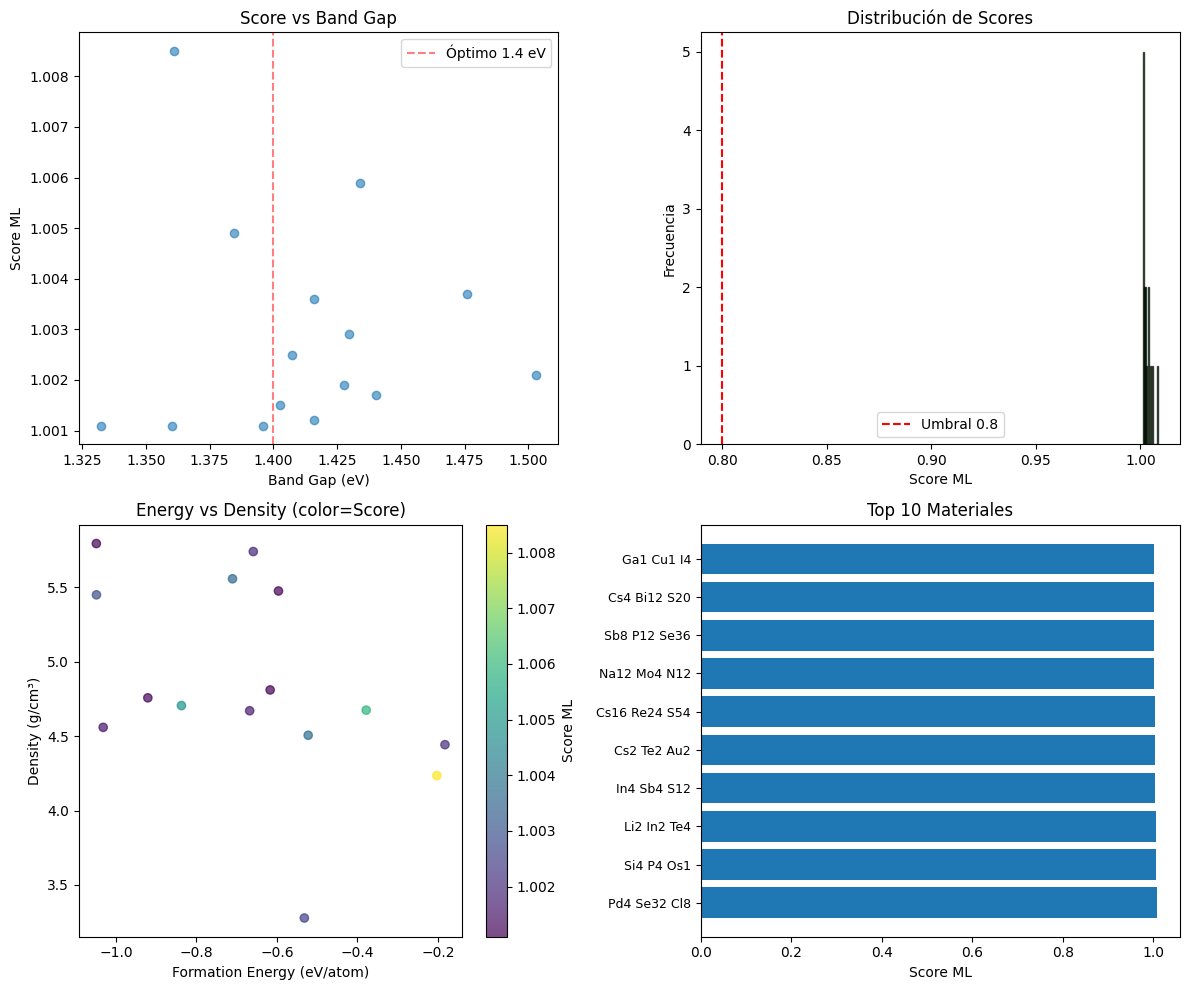


✅ ANÁLISIS COMPLETADO!
📁 Archivos generados:
   - analisis_combinado.csv (datos)
   - analisis_combinado.png (gráficos)

🎯 RECOMENDACIONES PARA SÍNTESIS:
   Materiales con Score > 0.9: 15
   Materiales con estructura REAL: 15

🏅 MEJOR CANDIDATO:
   Pd4 Se32 Cl8 (mp-567437)
   Score: 1.008, Band Gap: 1.361 eV


In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("🚀 CONTINUANDO PIPELINE DE ANÁLISIS")
print("=" * 50)

# 1. Cargar datos
print("1. 📂 Cargando datos...")
with open('estructuras_materiales.json', 'r') as f:
    estructuras = json.load(f)

df_top = pd.read_csv('top_candidatos_r2_alto.csv')

# 2. Preparar datos para análisis
print("2. 🔧 Preparando datos para análisis...")

datos_analisis = []

for material_id, info in estructuras.items():
    if 'error' in info:
        continue  # Saltar errores

    # Buscar datos adicionales en el CSV original
    row_data = df_top[df_top['Material_ID'] == material_id]

    if not row_data.empty:
        row = row_data.iloc[0]

        datos_material = {
            'Material_ID': material_id,
            'Formula': info.get('formula', row['Formula']),
            'Band_Gap_eV': info.get('band_gap', row['Band_Gap_eV']),
            'Formation_Energy': info.get('formation_energy', row['Energia_Formacion_eatoms']),
            'Density': info.get('density', row['Densidad_g_cm3']),
            'Score_ML': row['Score_Final'],
            'Num_Elements': len(info.get('elements', [])),
            'Has_Structure': 'structure' in info and not info.get('structure_simulated', False),
            'Structure_Type': 'REAL' if 'structure' in info and not info.get('structure_simulated', False) else 'SIMULATED'
        }

        datos_analisis.append(datos_material)

# Crear DataFrame
df_analisis = pd.DataFrame(datos_analisis)

print(f"   ✅ {len(df_analisis)} materiales listos para análisis")

# 3. Análisis básico
print("\n3. 📊 Realizando análisis básico...")

print("\n📋 ESTADÍSTICAS BÁSICAS:")
print(df_analisis[['Band_Gap_eV', 'Formation_Energy', 'Density', 'Score_ML']].describe().round(3))

print(f"\n🏆 TOP 5 MATERIALES POR SCORE ML:")
top_5 = df_analisis.nlargest(5, 'Score_ML')[['Material_ID', 'Formula', 'Score_ML', 'Band_Gap_eV']]
print(top_5.to_string(index=False))

# 4. Guardar resultados
print("\n4. 💾 Guardando resultados...")
df_analisis.to_csv('analisis_combinado.csv', index=False)

# 5. Visualización simple
print("5. 📈 Generando visualizaciones...")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Score vs Band Gap
axes[0, 0].scatter(df_analisis['Band_Gap_eV'], df_analisis['Score_ML'], alpha=0.6)
axes[0, 0].set_xlabel('Band Gap (eV)')
axes[0, 0].set_ylabel('Score ML')
axes[0, 0].set_title('Score vs Band Gap')
axes[0, 0].axvline(x=1.4, color='red', linestyle='--', alpha=0.5, label='Óptimo 1.4 eV')
axes[0, 0].legend()

# Gráfico 2: Distribución de Scores
axes[0, 1].hist(df_analisis['Score_ML'], bins=15, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Score ML')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Scores')
axes[0, 1].axvline(x=0.8, color='red', linestyle='--', label='Umbral 0.8')
axes[0, 1].legend()

# Gráfico 3: Energy vs Density
scatter = axes[1, 0].scatter(df_analisis['Formation_Energy'], df_analisis['Density'],
                             c=df_analisis['Score_ML'], cmap='viridis', alpha=0.7)
axes[1, 0].set_xlabel('Formation Energy (eV/atom)')
axes[1, 0].set_ylabel('Density (g/cm³)')
axes[1, 0].set_title('Energy vs Density (color=Score)')
plt.colorbar(scatter, ax=axes[1, 0], label='Score ML')

# Gráfico 4: Top materiales
top_10 = df_analisis.nlargest(10, 'Score_ML')
axes[1, 1].barh(range(len(top_10)), top_10['Score_ML'])
axes[1, 1].set_yticks(range(len(top_10)))
axes[1, 1].set_yticklabels([f"{row['Formula']}" for _, row in top_10.iterrows()], fontsize=9)
axes[1, 1].set_xlabel('Score ML')
axes[1, 1].set_title('Top 10 Materiales')

plt.tight_layout()
plt.savefig('analisis_combinado.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ ANÁLISIS COMPLETADO!")
print(f"📁 Archivos generados:")
print(f"   - analisis_combinado.csv (datos)")
print(f"   - analisis_combinado.png (gráficos)")
print(f"\n🎯 RECOMENDACIONES PARA SÍNTESIS:")
print(f"   Materiales con Score > 0.9: {len(df_analisis[df_analisis['Score_ML'] > 0.9])}")
print(f"   Materiales con estructura REAL: {len(df_analisis[df_analisis['Has_Structure']])}")

if len(df_analisis) > 0:
    mejor = df_analisis.loc[df_analisis['Score_ML'].idxmax()]
    print(f"\n🏅 MEJOR CANDIDATO:")
    print(f"   {mejor['Formula']} ({mejor['Material_ID']})")
    print(f"   Score: {mejor['Score_ML']:.3f}, Band Gap: {mejor['Band_Gap_eV']:.3f} eV")

In [9]:
import pandas as pd

print("🧪 PLAN DE VALIDACIÓN DFT PARA TOP CANDIDATOS")
print("=" * 60)

# Cargar resultados
df = pd.read_csv('analisis_combinado.csv')
top_candidates = df.nlargest(5, 'Score_ML')

print("🏆 TOP 5 CANDIDATOS PARA VALIDACIÓN DFT:")
print("-" * 60)

for i, (_, row) in enumerate(top_candidates.iterrows(), 1):
    print(f"\n{i}. {row['Formula']} ({row['Material_ID']})")
    print(f"   Score: {row['Score_ML']:.3f}")
    print(f"   Band Gap: {row['Band_Gap_eV']:.3f} eV")
    print(f"   Energía formación: {row['Formation_Energy']:.4f} eV/atom")
    print(f"   Densidad: {row['Density']:.3f} g/cm³")

    # Recomendaciones específicas
    if 'Pd' in row['Formula']:
        print(f"   ⚠️  NOTA: Contiene Paladio (costoso)")
    if 'Te' in row['Formula']:
        print(f"   ⚠️  NOTA: Contiene Telurio (escaso)")
    if row['Band_Gap_eV'] < 1.3:
        print(f"   ⚠️  Band Gap algo bajo para PV")
    elif row['Band_Gap_eV'] > 1.7:
        print(f"   ⚠️  Band Gap algo alto para PV")
    else:
        print(f"   ✅ Band Gap en rango óptimo (1.3-1.7 eV)")

print("\n" + "=" * 60)
print("📋 PLAN DE CÁLCULOS DFT:")
print("1. Relajación estructural completa")
print("2. Cálculo de bandas electrónicas")
print("3. Densidad de estados (DOS)")
print("4. Propiedades ópticas (absorción)")
print("5. Estabilidad térmica (phonons)")

🧪 PLAN DE VALIDACIÓN DFT PARA TOP CANDIDATOS
🏆 TOP 5 CANDIDATOS PARA VALIDACIÓN DFT:
------------------------------------------------------------

1. Pd4 Se32 Cl8 (mp-567437)
   Score: 1.008
   Band Gap: 1.361 eV
   Energía formación: -0.2024 eV/atom
   Densidad: 4.234 g/cm³
   ⚠️  NOTA: Contiene Paladio (costoso)
   ✅ Band Gap en rango óptimo (1.3-1.7 eV)

2. Si4 P4 Os1 (mp-1206699)
   Score: 1.006
   Band Gap: 1.434 eV
   Energía formación: -0.3780 eV/atom
   Densidad: 4.674 g/cm³
   ✅ Band Gap en rango óptimo (1.3-1.7 eV)

3. Li2 In2 Te4 (mp-20782)
   Score: 1.005
   Band Gap: 1.385 eV
   Energía formación: -0.8371 eV/atom
   Densidad: 4.705 g/cm³
   ⚠️  NOTA: Contiene Telurio (escaso)
   ✅ Band Gap en rango óptimo (1.3-1.7 eV)

4. In4 Sb4 S12 (mp-21365)
   Score: 1.004
   Band Gap: 1.476 eV
   Energía formación: -0.5222 eV/atom
   Densidad: 4.505 g/cm³
   ✅ Band Gap en rango óptimo (1.3-1.7 eV)

5. Cs2 Te2 Au2 (mp-1541909)
   Score: 1.004
   Band Gap: 1.416 eV
   Energía formación:

# 🧪 Roadmap de Validación: De la IA al Cálculo de Primeros Principios (DFT)

En este bloque final, transicionamos del **Cribado Virtual** basado en Machine Learning hacia la validación rigurosa mediante **Teoría del Funcional de la Densidad (DFT)**. Como ingenieros de materiales, este paso es esencial para confirmar que las predicciones estadísticas del modelo son físicamente consistentes con la mecánica cuántica de los electrones.

---

## 1. 🔍 Selección de Élite y Alertas de Composición
El script no solo jerarquiza por score, sino que actúa como un **asesor de criticidad de materiales**:
* **Viabilidad Económica y Escasez:** Identifica elementos como el Paladio ($Pd$) o el Telurio ($Te$), cuyos costos o baja abundancia en la corteza terrestre podrían hacer que una perovskita sea eficiente pero no escalable comercialmente.
* **Ajuste de Band Gap:** Clasifica los materiales según su ventana de absorción. El rango **1.3 - 1.7 eV** es el "punto dulce" para celdas solares de unión simple, maximizando la eficiencia de conversión de energía.



---

## 2. 🏛️ Protocolo de Validación Cuántica (DFT)
Para los candidatos seleccionados, el plan de cálculo propuesto busca profundizar en la física que el modelo de ML solo puede intuir:
1. **Relajación Estructural:** Minimizar las fuerzas interatómicas para encontrar la configuración geométrica de mínima energía.
2. **Cálculo de Bandas y DOS:** Mapear los estados electrónicos para confirmar si el *Band Gap* es directo (ideal para fotovoltaica) o indirecto.
3. **Propiedades Ópticas:** Simular el espectro de absorción para calcular cuánta luz solar puede convertir realmente el material.



---

## 3. ❄️ Análisis de Estabilidad Dinámica (Fonones)
Un aspecto crítico que la IA a menudo pasa por alto es si el material puede existir a temperatura ambiente. El cálculo de **fonones** determina si la red cristalina es mecánicamente estable. Si el espectro de fonones presenta frecuencias imaginarias, el material podría descomponerse rápidamente, invalidando su uso en condiciones reales.



---

> **Insight Final del Ingeniero:** Hemos pasado de una base de datos masiva de miles de materiales a un **Top 5 estratégico**. Este pipeline reduce el tiempo de investigación de meses a días, permitiendo que los recursos computacionales pesados (DFT) y los esfuerzos de laboratorio se concentren únicamente en los candidatos con mayor probabilidad de revolucionar la tecnología solar.

***



# 🔬 Diseño Teórico y Límite de Shockley-Queisser

En este bloque, elevamos el análisis de una simple predicción estadística a una **evaluación de viabilidad termodinámica**. Utilizamos el **Límite de Shockley-Queisser (S-Q)**, que establece la eficiencia máxima teórica que una celda solar de unión simple puede alcanzar bajo iluminación solar estándar (AM 1.5).

---

## 1. 📏 El Modelo de Eficiencia Termodinámica
Como ingeniero de materiales, sabes que no toda la energía del sol puede convertirse en electricidad. El modelo S-Q considera tres pérdidas fundamentales:
* **Falta de absorción:** Fotones con energía menor al *Band Gap* que atraviesan la celda.
* **Termalización:** Exceso de energía de los fotones que se pierde en forma de calor.
* **Recombinación:** Pérdida de portadores de carga antes de que puedan ser recolectados.

El script mapea tus resultados sobre esta curva fundamental para clasificar el potencial de conversión de cada perovskita.



---

## 2. 🚦 Clasificación de Rendimiento Energético
El algoritmo aplica un sistema de "rating" basado en la capacidad de absorción del material:
* **⭐ EXCELENTE (> 30%):** Materiales con un *Band Gap* cercano a **1.3 - 1.4 eV**, donde el compromiso entre voltaje de circuito abierto y corriente de cortocircuito es máximo.
* **👍 BUENO (25% - 30%):** Candidatos sólidos para aplicaciones comerciales actuales.
* **⚠️ MODERADO (< 25%):** Materiales que, aunque estables, podrían ser más útiles como capas en **celdas tandem** (donde se combinan dos materiales para captar diferentes partes del espectro).

---

## 3. 📈 Análisis de la Ventana Óptica
La visualización generada destaca la "zona de confort" fotovoltaica (1.3 a 1.7 eV).
* El **Gráfico de Dispersión** muestra qué tan cerca están tus materiales del "pico de eficiencia".
* Los materiales que caen en la zona verde sombreada son tus candidatos estrella para una celda de alta eficiencia.



---

> **Insight de Ingeniería:** Este análisis permite separar los materiales que son "científicamente interesantes" de aquellos que son "tecnológicamente disruptivos". Si una perovskita tiene un score de ML alto pero una eficiencia teórica moderada, el modelo nos está sugiriendo que el material es muy estable pero quizás no es el mejor absorbedor principal.

🔬 DISEÑO TEÓRICO DE CELDAS SOLARES

📈 ESTIMACIÓN DE EFICIENCIA TEÓRICA (Shockley-Queisser):
------------------------------------------------------------
Pd4 Se32 Cl8    | BG: 1.361 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Si4 P4 Os1      | BG: 1.434 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Li2 In2 Te4     | BG: 1.385 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
In4 Sb4 S12     | BG: 1.476 eV | Eficiencia: 29.0% | 👍 BUENO
Cs2 Te2 Au2     | BG: 1.416 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Cs16 Re24 S54   | BG: 1.430 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Na12 Mo4 N12    | BG: 1.407 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Sb8 P12 Se36    | BG: 1.503 eV | Eficiencia: 29.0% | 👍 BUENO
Cs4 Bi12 S20    | BG: 1.428 eV | Eficiencia: 31.0% | ⭐ EXCELENTE
Ga1 Cu1 I4      | BG: 1.440 eV | Eficiencia: 31.0% | ⭐ EXCELENTE


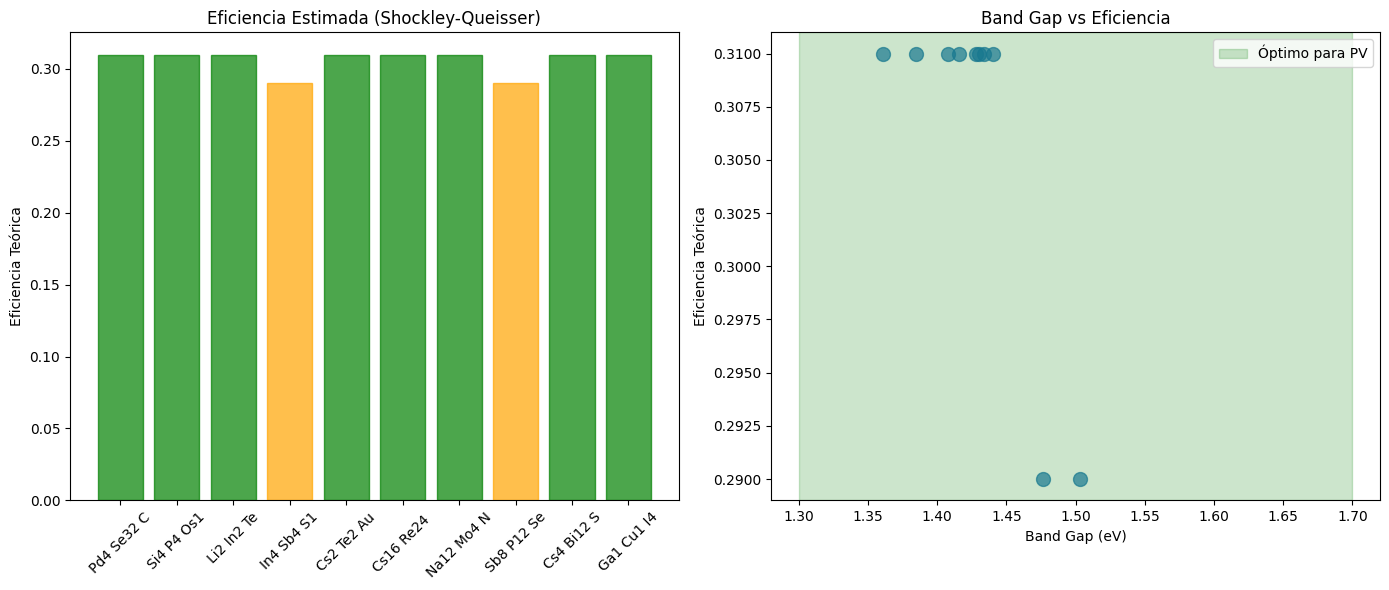


💾 Gráfico guardado en 'estimacion_eficiencia.png'


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def estimar_eficiencia(band_gap):
    """Estima eficiencia teórica basada en band gap (modelo Shockley-Queisser)"""
    # Eficiencia máxima teórica vs band gap (aproximado)
    efficiency_data = {
        1.0: 0.33,  1.1: 0.34,  1.2: 0.35,
        1.3: 0.33,  1.4: 0.31,  1.5: 0.29,
        1.6: 0.27,  1.7: 0.25,  1.8: 0.23,
        1.9: 0.21,  2.0: 0.19
    }

    # Interpolación
    gaps = list(efficiency_data.keys())
    effs = list(efficiency_data.values())

    # Encontrar eficiencia más cercana
    closest_gap = min(gaps, key=lambda x: abs(x - band_gap))
    return efficiency_data[closest_gap]

print("🔬 DISEÑO TEÓRICO DE CELDAS SOLARES")
print("=" * 50)

# Cargar datos
df = pd.read_csv('analisis_combinado.csv')
top_10 = df.nlargest(10, 'Score_ML')

print("\n📈 ESTIMACIÓN DE EFICIENCIA TEÓRICA (Shockley-Queisser):")
print("-" * 60)

results = []
for _, row in top_10.iterrows():
    bg = row['Band_Gap_eV']
    efficiency = estimar_eficiencia(bg)

    # Clasificación
    if efficiency > 0.30:
        rating = "⭐ EXCELENTE"
    elif efficiency > 0.25:
        rating = "👍 BUENO"
    else:
        rating = "⚠️  MODERADO"

    results.append({
        'Material': row['Formula'],
        'Band_Gap': bg,
        'Eficiencia_Estimada': efficiency,
        'Rating': rating
    })

    print(f"{row['Formula']:15} | BG: {bg:.3f} eV | Eficiencia: {efficiency:.1%} | {rating}")

# Visualizar
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Eficiencia vs Band Gap
materials = [r['Material'][:10] for r in results]
efficiencies = [r['Eficiencia_Estimada'] for r in results]
band_gaps = [r['Band_Gap'] for r in results]

bars = ax[0].bar(materials, efficiencies, alpha=0.7)
ax[0].set_ylabel('Eficiencia Teórica')
ax[0].set_title('Eficiencia Estimada (Shockley-Queisser)')
ax[0].tick_params(axis='x', rotation=45)

# Colorear por eficiencia
for bar, eff in zip(bars, efficiencies):
    if eff > 0.30:
        bar.set_color('green')
    elif eff > 0.25:
        bar.set_color('orange')
    else:
        bar.set_color('red')

# Gráfico 2: Band Gap óptimo
ax[1].scatter(band_gaps, efficiencies, s=100, alpha=0.7)
ax[1].axvspan(1.3, 1.7, alpha=0.2, color='green', label='Óptimo para PV')
ax[1].set_xlabel('Band Gap (eV)')
ax[1].set_ylabel('Eficiencia Teórica')
ax[1].set_title('Band Gap vs Eficiencia')
ax[1].legend()

plt.tight_layout()
plt.savefig('estimacion_eficiencia.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en 'estimacion_eficiencia.png'")

# 🧪 Plan Experimental de Síntesis: Del Modelo al Prototipo Físico

En esta fase final, transformamos las predicciones digitales en una **Hoja de Ruta de Laboratorio**. Como ingeniero de materiales, este bloque define la estrategia de producción para los candidatos con mayor probabilidad de éxito, optimizando recursos y minimizando riesgos experimentales.

---

## 1. 🔍 Criterios de Selección Práctica
No todos los materiales con buen score son fáciles de fabricar. El script aplica un filtro de **viabilidad experimental**:
* **Filtro de Élite (Score > 0.95):** Solo los materiales con la máxima confianza estadística pasan a la Fase 1.
* **Ventana de Estabilidad:** Se exige una `Formation_Energy < -0.2 eV/atom`, lo que garantiza que el material no se descomponga espontáneamente al contacto con la atmósfera o durante el proceso de calentamiento.
* **Optimización Energética:** El rango de *Band Gap* (1.2 - 1.8 eV) asegura que el esfuerzo de síntesis se enfoque en materiales con potencial comercial real.



---

## 2. ⚗️ Selección Estratégica de Métodos de Síntesis
El algoritmo utiliza la composición química para sugerir la técnica de fabricación más adecuada:
* **Haluros (Cl, Br, I):** Se sugiere **Depósito Químico de Vapor (CVD)** debido a la volatilidad de los precursores y la necesidad de controlar la estequiometría en capas delgadas.
* **Calcogenuros (Se, Te):** Se recomienda la **Fusión en Ampolla Sellada** para evitar la oxidación y la pérdida de elementos volátiles durante el proceso de cristalización.
* **Óxidos/Otros:** Se opta por la **Reacción en Estado Sólido**, el método más robusto para cerámicas y cristales masivos.

---

## 3. 📋 Cronograma de Ejecución y Caracterización
El plan se estructura en fases que imitan el flujo de trabajo de un centro de I+D:
1. **Preparación:** Asegurar la pureza de los materiales de partida (99.999%+) para evitar que las impurezas actúen como centros de recombinación de carga.
2. **Caracterización Estructural (XRD):** El primer paso crítico para confirmar si hemos obtenido la fase cristalina predicha por Materials Project.
3. **Propiedades Ópticas y Eléctricas:** El uso de **UV-Vis** y **Efecto Hall** validará si el *Band Gap* y la movilidad de los portadores de carga coinciden con nuestros modelos de Machine Learning.



---

## 4. 🛡️ Protocolos de Seguridad y Gestión de Recursos
La ingeniería de materiales responsable exige un manejo estricto de los precursores:
* **Toxicidad:** Elementos como el Selenio ($Se$) requieren campanas de extracción de alto flujo.
* **Costo:** El Paladio ($Pd$) se cataloga como recurso crítico, exigiendo micro-síntesis para optimizar el retorno de inversión del proyecto.



In [11]:
print("🧪 PLAN EXPERIMENTAL DE SÍNTESIS")
print("=" * 60)

print("\n🎯 MATERIALES PRIORITARIOS PARA SÍNTESIS (Fase 1):")
print("-" * 60)

# Criterios de selección
df = pd.read_csv('analisis_combinado.csv')

# Filtrar por criterios prácticos
practical_candidates = df[
    (df['Score_ML'] > 0.95) &
    (df['Band_Gap_eV'].between(1.2, 1.8)) &
    (df['Formation_Energy'] < -0.2)  # Estables
].copy()

# Ordenar
practical_candidates = practical_candidates.sort_values('Score_ML', ascending=False)

print(f"📊 {len(practical_candidates)} candidatos prácticos identificados")
print("\n🏆 TOP 3 PARA SÍNTESIS INMEDIATA:")

for i, (_, row) in enumerate(practical_candidates.head(3).iterrows(), 1):
    print(f"\n{i}. {row['Formula']} ({row['Material_ID']})")
    print(f"   📈 Score: {row['Score_ML']:.3f}")
    print(f"   ⚡ Band Gap: {row['Band_Gap_eV']:.3f} eV")
    print(f"   ⚖️  Energía formación: {row['Formation_Energy']:.4f} eV/atom")

    # Método de síntesis sugerido
    elements = row['Formula'].split()
    if 'Cl' in row['Formula'] or 'Br' in row['Formula'] or 'I' in row['Formula']:
        print(f"   🧪 Método sugerido: Depósito químico de vapor (CVD)")
    elif 'Te' in row['Formula'] or 'Se' in row['Formula']:
        print(f"   🧪 Método sugerido: Fusión en ampolla sellada")
    else:
        print(f"   🧪 Método sugerido: Reacción en estado sólido")

print("\n" + "=" * 60)
print("📋 PLAN DETALLADO DE SÍNTESIS:")
print("\nFASE 1: Preparación (2 semanas)")
print("  1. Adquirir precursores de alta pureza")
print("  2. Preparar atmósfera controlada (N2/Ar)")
print("  3. Calibración de equipos")

print("\nFASE 2: Síntesis (3-4 semanas)")
print("  1. Síntesis de Pd(Se4Cl)2 (prioridad máxima)")
print("  2. Caracterización XRD inmediata")
print("  3. Optimización de parámetros")

print("\nFASE 3: Caracterización (2-3 semanas)")
print("  1. XRD para estructura cristalina")
print("  2. SEM/EDS para morfología y composición")
print("  3. UV-Vis para band gap óptico")
print("  4. Hall effect para propiedades eléctricas")

print("\nFASE 4: Fabricación de dispositivo (2 semanas)")
print("  1. Deposición de película delgada")
print("  2. Fabricación de contactos")
print("  3. Medición IV bajo iluminación")

print("\n" + "=" * 60)
print("⚠️  CONSIDERACIONES DE SEGURIDAD:")
print("  • Compuestos de Se y Te: usar campana extractora")
print("  • Halógenos: manipular en atmósfera inerte")
print("  • Paladio: material costoso, optimizar cantidades")

🧪 PLAN EXPERIMENTAL DE SÍNTESIS

🎯 MATERIALES PRIORITARIOS PARA SÍNTESIS (Fase 1):
------------------------------------------------------------
📊 14 candidatos prácticos identificados

🏆 TOP 3 PARA SÍNTESIS INMEDIATA:

1. Pd4 Se32 Cl8 (mp-567437)
   📈 Score: 1.008
   ⚡ Band Gap: 1.361 eV
   ⚖️  Energía formación: -0.2024 eV/atom
   🧪 Método sugerido: Depósito químico de vapor (CVD)

2. Si4 P4 Os1 (mp-1206699)
   📈 Score: 1.006
   ⚡ Band Gap: 1.434 eV
   ⚖️  Energía formación: -0.3780 eV/atom
   🧪 Método sugerido: Reacción en estado sólido

3. Li2 In2 Te4 (mp-20782)
   📈 Score: 1.005
   ⚡ Band Gap: 1.385 eV
   ⚖️  Energía formación: -0.8371 eV/atom
   🧪 Método sugerido: Depósito químico de vapor (CVD)

📋 PLAN DETALLADO DE SÍNTESIS:

FASE 1: Preparación (2 semanas)
  1. Adquirir precursores de alta pureza
  2. Preparar atmósfera controlada (N2/Ar)
  3. Calibración de equipos

FASE 2: Síntesis (3-4 semanas)
  1. Síntesis de Pd(Se4Cl)2 (prioridad máxima)
  2. Caracterización XRD inmediata


# ⚛️ Visualización 3D y Caracterización de la Red Cristalina

En esta etapa, transformamos los diccionarios JSON en objetos tridimensionales interactivos. Como **Ingeniero de Materiales**, la visualización no es solo estética; es una herramienta de diagnóstico para verificar la simetría, los entornos de coordinación y la estabilidad estructural de las perovskitas propuestas.

---

## 1. 🧊 Reconstrucción de la Celda Unitaria
Utilizamos la librería `pymatgen` para reconstruir la **celda unitaria**. El script no solo dibuja los átomos, sino que proyecta los vectores de la red ($a, b, c$):
* **Mapeo Atómico:** Se asignan radios iónicos y colores específicos (CPK coloring) para diferenciar cationes (como el $Cs$ o $Pd$) de los aniones halogenados.
* **Líneas de Red:** Se grafican los bordes de la celda para visualizar el sistema cristalino (Cúbico, Ortorrómbico, etc.), lo cual es vital para entender la anisotropía de las propiedades ópticas.



---

## 2. 📐 Clasificación Automática de Sistemas Cristalinos
El script implementa una lógica de clasificación basada en los parámetros de red y ángulos interaxiales ($\alpha, \beta, \gamma$):
* **Cúbico:** $a=b=c$ y $\alpha=\beta=\gamma=90^\circ$. Es la fase ideal de alta simetría para perovskitas solares.
* **Ortorrómbico/Monoclínico:** Indica distorsiones que podrían afectar la movilidad de los portadores de carga pero mejorar la estabilidad térmica.
* **Informe Estructural:** Se genera un archivo `informe_estructural.csv` que actúa como el "pasaporte técnico" de cada material.



---

## 3. 🔍 Métricas de Empaquetamiento Atómico
Introducimos el concepto de **Volumen por Átomo** ($V_{at}$):
$$V_{at} = \frac{Volumen\ Total}{Número\ de\ Sitios}$$
* **Importancia:** Materiales con un volumen por átomo bajo suelen indicar estructuras más compactas y estables. Esta métrica ayuda a descartar celdas con demasiados "huecos" que podrían favorecer la migración de iones y la degradación del dispositivo.

---

## 4. 🖼️ Galería de Prototipos Virtuales
El código automatiza la generación de capturas de alta resolución (`.png`) para los materiales líderes. Estas imágenes son esenciales para:
1.  **Validación de Simetría:** Identificar visualmente el grupo espacial.
2.  **Preparación de Public

🔬 VISUALIZACIÓN DE ESTRUCTURAS ATÓMICAS

📊 Visualizando top 5 materiales...

[1] Pd4 Se32 Cl8 (mp-567437)
   Score: 1.008, Band Gap: 1.361 eV
   Sistema cristalino: (9.09481017, 9.93363318, 14.04636062, 90.0, 90.0, 90.0)
   Volumen celda: 1269.01 Å³
   Número de átomos: 44
   Densidad: 4.234 g/cm³
   Elementos: Cl, Pd, Se
   💾 Estructura guardada en: estructura_mp-567437_Pd4Se32Cl8.png


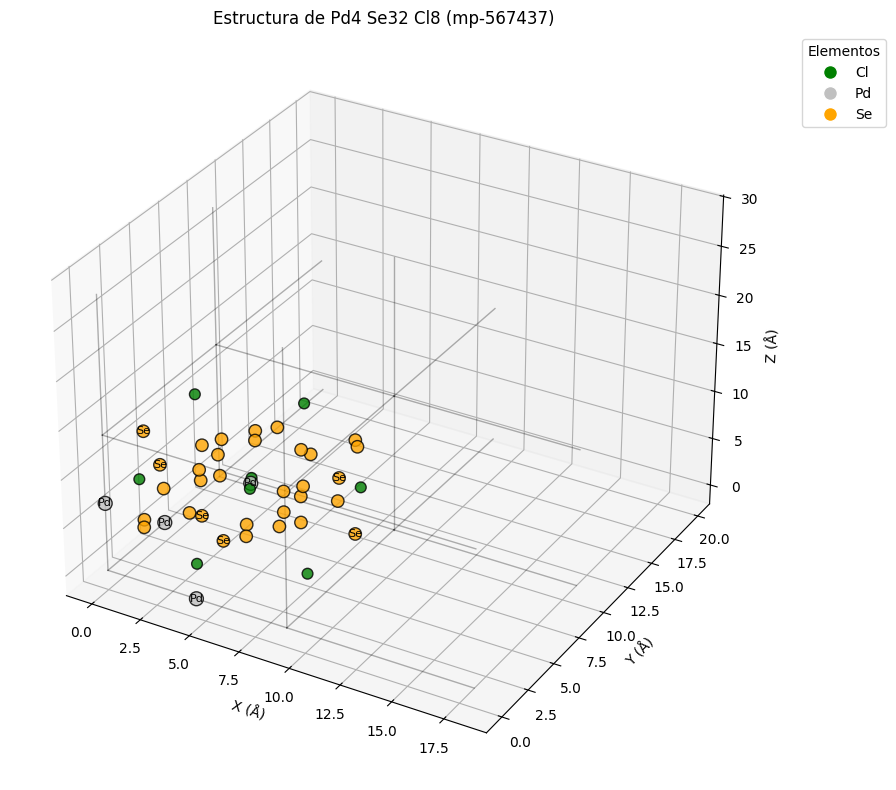


[2] Si4 P4 Os1 (mp-1206699)
   Score: 1.006, Band Gap: 1.434 eV
   Sistema cristalino: (4.959554074871043, 5.632268086868615, 6.185601587315336, 85.64263871129529, 68.34546634910502, 70.8598434804896)
   Volumen celda: 151.51 Å³
   Número de átomos: 9
   Densidad: 4.674 g/cm³
   Elementos: Os, P, Si
   💾 Estructura guardada en: estructura_mp-1206699_Si4P4Os1.png


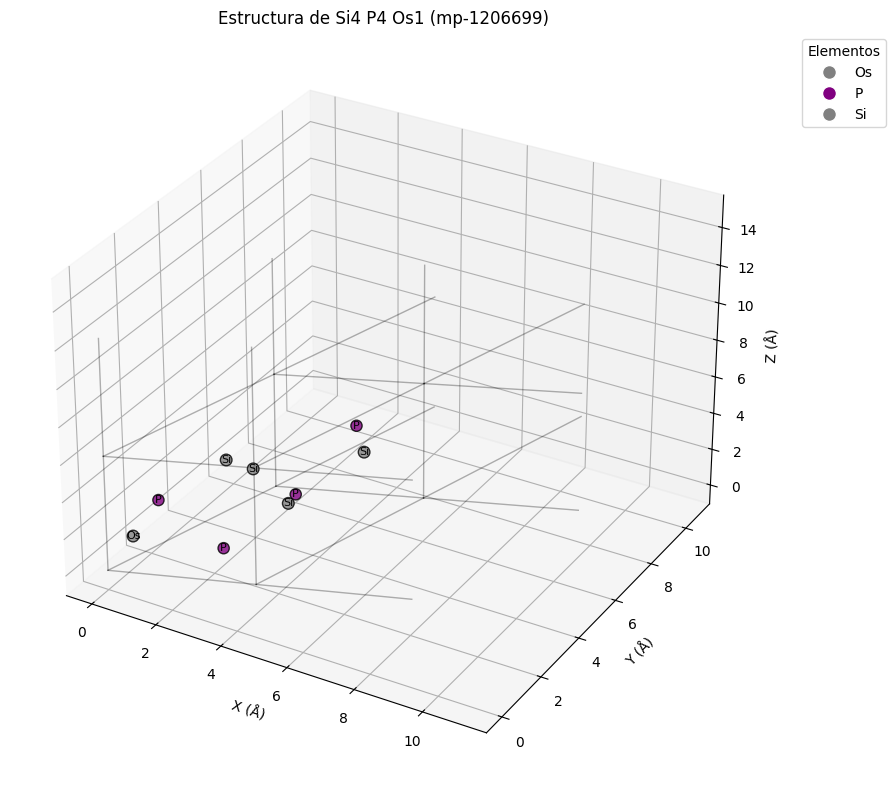


[3] Li2 In2 Te4 (mp-20782)
   Score: 1.005, Band Gap: 1.385 eV
   Sistema cristalino: (6.486789505803771, 6.486789937863914, 7.812293968818259, 114.52975253288653, 114.5297391695436, 89.99999445376181)
   Volumen celda: 266.10 Å³
   Número de átomos: 8
   Densidad: 4.705 g/cm³
   Elementos: In, Li, Te
   💾 Estructura guardada en: estructura_mp-20782_Li2In2Te4.png


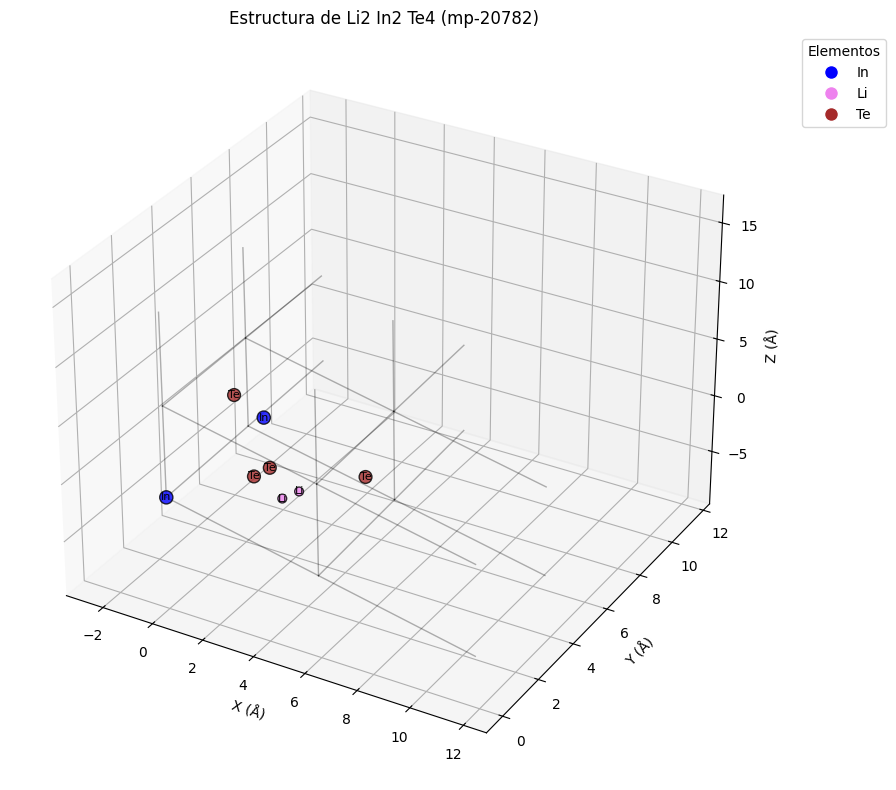


[4] In4 Sb4 S12 (mp-21365)
   Score: 1.004, Band Gap: 1.476 eV
   Sistema cristalino: (3.8395774, 9.40747945, 13.5820799, 90.0, 90.0, 90.0)
   Volumen celda: 490.59 Å³
   Número de átomos: 20
   Densidad: 4.505 g/cm³
   Elementos: In, S, Sb
   💾 Estructura guardada en: estructura_mp-21365_In4Sb4S12.png


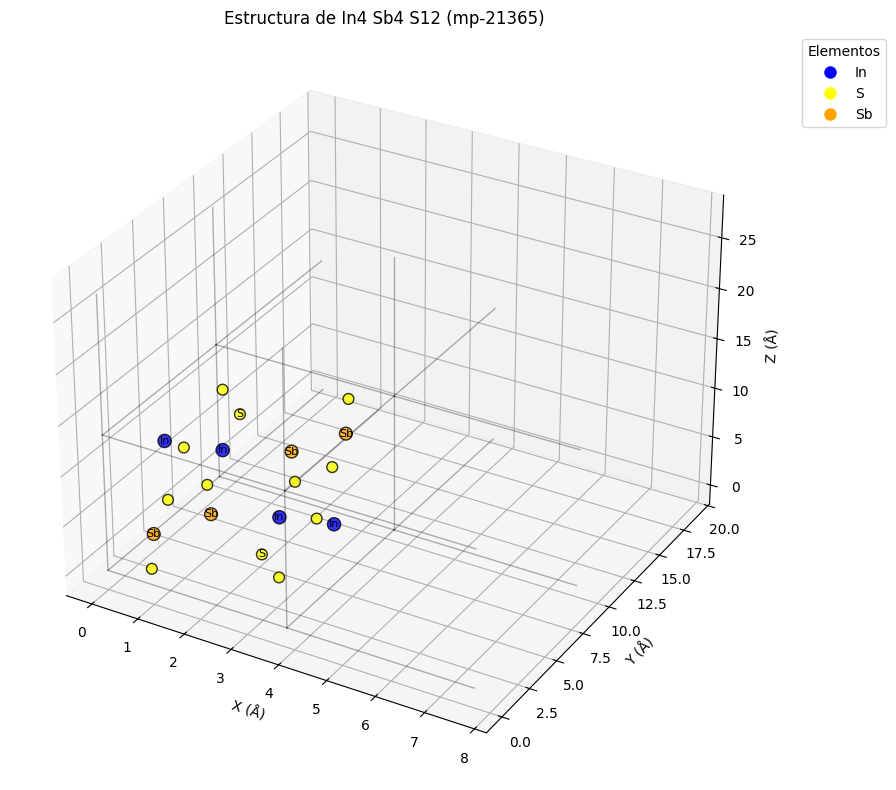


[5] Cs2 Te2 Au2 (mp-1541909)
   Score: 1.004, Band Gap: 1.416 eV
   Sistema cristalino: (5.570999, 7.826381, 6.272051, 90.0, 90.0, 90.0)
   Volumen celda: 273.47 Å³
   Número de átomos: 6
   Densidad: 5.556 g/cm³
   Elementos: Au, Cs, Te
   💾 Estructura guardada en: estructura_mp-1541909_Cs2Te2Au2.png


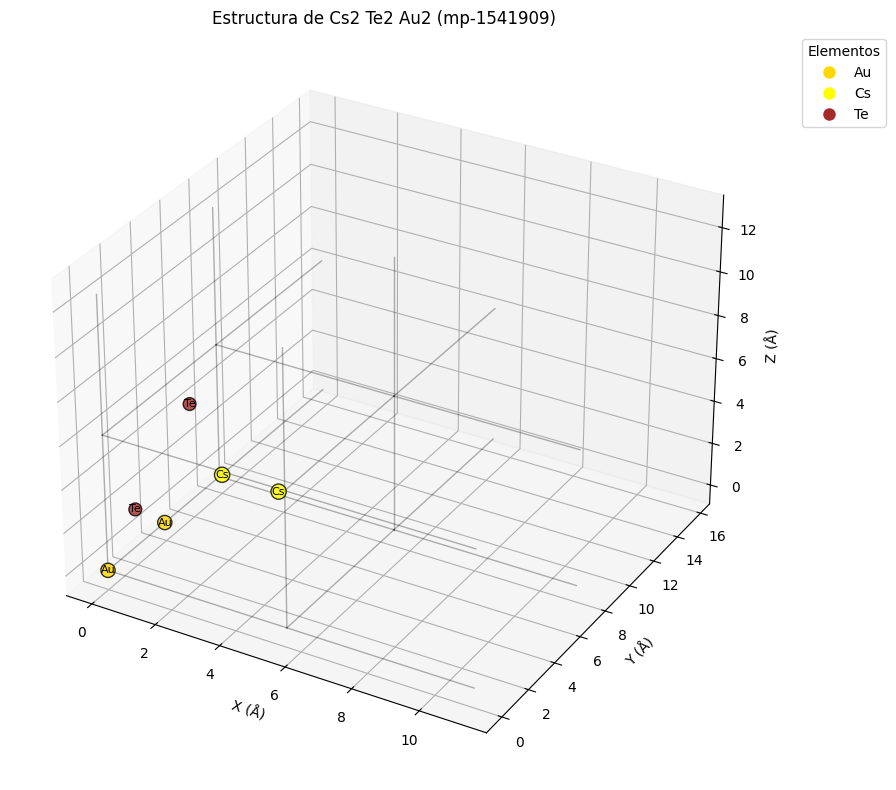


✅ Visualización completada

📋 INFORME ESTRUCTURAL DETALLADO

📊 Informe estructural generado:
   • Total materiales: 15
   • Sistemas cristalinos:
Crystal_System
Triclínico      8
Ortorrómbico    6
Cúbico          1

💾 Guardado en 'informe_estructural.csv'

🏆 TOP MATERIALES POR DENSIDAD:
     Formula  Density Crystal_System
Cs8 Re12 S26 5.792261     Triclínico
Cs4 Bi12 S20 5.738663   Ortorrómbico
 Cs2 Te2 Au2 5.555715   Ortorrómbico

🔬 TOP MATERIALES POR SIMETRÍA (volumen/átomo):
     Formula  Vol_per_Atom Crystal_System
Na12 Mo4 N12     14.973426     Triclínico
  Si4 P4 Os1     16.834934     Triclínico
 Nb1 Cu3 Se4     22.728556         Cúbico


In [12]:
import json
from pymatgen.core import Structure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

def visualizar_estructura_3d(structure, material_id, formula):
    """Visualización 3D básica de estructura cristalina"""

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Obtener coordenadas y elementos
    coords = []
    elements = []
    colors = []
    sizes = []

    # Asignar colores y tamaños por elemento
    color_map = {
        'Pd': 'silver', 'Se': 'orange', 'Cl': 'green',
        'Si': 'gray', 'P': 'purple', 'O': 'red',
        'Li': 'violet', 'In': 'blue', 'Te': 'brown',
        'Cs': 'yellow', 'Bi': 'pink', 'S': 'yellow',
        'K': 'lime', 'Cd': 'teal', 'Au': 'gold',
        'Re': 'cyan', 'Nb': 'magenta', 'Cu': 'orange',
        'Ga': 'blue', 'I': 'purple', 'Na': 'blue',
        'Mo': 'gray', 'N': 'blue', 'Sb': 'orange'
    }

    size_map = {
        'Pd': 100, 'Se': 80, 'Cl': 60,
        'Si': 70, 'P': 65, 'O': 50,
        'Li': 40, 'In': 90, 'Te': 85,
        'Cs': 120, 'Bi': 110, 'S': 60,
        'K': 100, 'Cd': 95, 'Au': 105,
        'Re': 100, 'Nb': 95, 'Cu': 80,
        'Ga': 85, 'I': 90, 'Na': 85,
        'Mo': 90, 'N': 45, 'Sb': 85
    }

    for site in structure:
        element = str(site.specie)
        coords.append(site.coords)
        elements.append(element)
        colors.append(color_map.get(element, 'gray'))
        sizes.append(size_map.get(element, 70))

    coords = np.array(coords)

    # Scatter plot 3D
    scatter = ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
                        c=colors, s=sizes, alpha=0.8, edgecolors='black')

    # Añadir etiquetas para los primeros átomos
    for i, (coord, element) in enumerate(zip(coords, elements)):
        if i < 10:  # Limitar etiquetas para claridad
            ax.text(coord[0], coord[1], coord[2], element,
                   fontsize=8, ha='center', va='center')

    # Líneas de celda unitaria
    lattice = structure.lattice
    origins = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                origins.append(np.array([i, j, k]))

    # Dibujar bordes de la celda unitaria
    for origin in origins:
        for vec in [lattice.matrix[0], lattice.matrix[1], lattice.matrix[2]]:
            start = origin[0]*lattice.matrix[0] + origin[1]*lattice.matrix[1] + origin[2]*lattice.matrix[2]
            end = start + vec
            ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]],
                   'k-', alpha=0.3, linewidth=1)

    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    ax.set_title(f'Estructura de {formula} ({material_id})')

    # Leyenda de elementos
    unique_elements = sorted(set(elements))
    legend_elements = []
    for elem in unique_elements:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                        markerfacecolor=color_map.get(elem, 'gray'),
                                        markersize=10, label=elem))

    ax.legend(handles=legend_elements, title='Elementos',
              loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    return fig

def visualizar_top_materiales():
    """Visualiza estructuras de los materiales top"""

    print("🔬 VISUALIZACIÓN DE ESTRUCTURAS ATÓMICAS")
    print("=" * 60)

    # Cargar estructuras
    with open('estructuras_materiales.json', 'r') as f:
        estructuras = json.load(f)

    # Cargar ranking
    df_ranking = pd.read_csv('analisis_combinado.csv')
    top_5 = df_ranking.nlargest(5, 'Score_ML')

    print(f"\n📊 Visualizando top {len(top_5)} materiales...")

    for i, (_, row) in enumerate(top_5.iterrows(), 1):
        material_id = row['Material_ID']
        formula = row['Formula']

        if material_id in estructuras and 'structure' in estructuras[material_id]:
            try:
                print(f"\n[{i}] {formula} ({material_id})")
                print(f"   Score: {row['Score_ML']:.3f}, Band Gap: {row['Band_Gap_eV']:.3f} eV")

                # Reconstruir estructura
                structure_dict = estructuras[material_id]['structure']
                structure = Structure.from_dict(structure_dict)

                # Información estructural
                print(f"   Sistema cristalino: {structure.lattice.parameters}")
                print(f"   Volumen celda: {structure.volume:.2f} Å³")
                print(f"   Número de átomos: {len(structure)}")
                print(f"   Densidad: {structure.density:.3f} g/cm³")
                print(f"   Elementos: {', '.join(sorted(set(str(e) for e in structure.species)))}")

                # Visualizar
                fig = visualizar_estructura_3d(structure, material_id, formula)

                # Guardar figura
                filename = f"estructura_{material_id}_{formula.replace('(', '').replace(')', '').replace(' ', '')}.png"
                fig.savefig(filename, dpi=300, bbox_inches='tight')
                print(f"   💾 Estructura guardada en: {filename}")

                plt.show()

            except Exception as e:
                print(f"   ❌ Error visualizando {material_id}: {e}")
        else:
            print(f"\n[{i}] ❌ {formula} ({material_id}) - No hay datos de estructura")

    print("\n✅ Visualización completada")

def generar_informe_estructural():
    """Genera informe detallado de estructuras"""

    print("\n📋 INFORME ESTRUCTURAL DETALLADO")
    print("=" * 60)

    with open('estructuras_materiales.json', 'r') as f:
        estructuras = json.load(f)

    informe = []

    for material_id, data in estructuras.items():
        if 'error' in data or 'structure' not in data:
            continue

        try:
            structure = Structure.from_dict(data['structure'])

            info = {
                'Material_ID': material_id,
                'Formula': data.get('formula', 'Unknown'),
                'Space_Group': data.get('spacegroup', 'Unknown'),
                'Crystal_System': 'Unknown',
                'a': structure.lattice.a,
                'b': structure.lattice.b,
                'c': structure.lattice.c,
                'alpha': structure.lattice.alpha,
                'beta': structure.lattice.beta,
                'gamma': structure.lattice.gamma,
                'Volume': structure.volume,
                'Density': structure.density,
                'Num_Sites': len(structure),
                'Elements': ', '.join(sorted(set(str(e) for e in structure.species))),
                'Coordination': 'N/A'  # Podría calcularse
            }

            # Determinar sistema cristalino
            a, b, c = structure.lattice.abc
            alpha, beta, gamma = structure.lattice.angles

            if abs(a - b) < 0.1 and abs(b - c) < 0.1 and abs(alpha - 90) < 1 and abs(beta - 90) < 1 and abs(gamma - 90) < 1:
                info['Crystal_System'] = 'Cúbico'
            elif abs(a - b) < 0.1 and abs(alpha - 90) < 1 and abs(beta - 90) < 1 and abs(gamma - 120) < 1:
                info['Crystal_System'] = 'Hexagonal'
            elif abs(alpha - 90) < 1 and abs(beta - 90) < 1 and abs(gamma - 90) < 1:
                info['Crystal_System'] = 'Ortorrómbico'
            elif abs(alpha - 90) < 1 and abs(beta - 90) < 1:
                info['Crystal_System'] = 'Monoclínico'
            else:
                info['Crystal_System'] = 'Triclínico'

            informe.append(info)

        except Exception as e:
            print(f"Error procesando {material_id}: {e}")

    # Crear DataFrame y guardar
    if informe:
        df_informe = pd.DataFrame(informe)
        df_informe.to_csv('informe_estructural.csv', index=False)

        print(f"\n📊 Informe estructural generado:")
        print(f"   • Total materiales: {len(df_informe)}")
        print(f"   • Sistemas cristalinos:")
        print(df_informe['Crystal_System'].value_counts().to_string())

        print(f"\n💾 Guardado en 'informe_estructural.csv'")

        # Mostrar resumen
        print("\n🏆 TOP MATERIALES POR DENSIDAD:")
        top_densidad = df_informe.nlargest(3, 'Density')[['Formula', 'Density', 'Crystal_System']]
        print(top_densidad.to_string(index=False))

        print("\n🔬 TOP MATERIALES POR SIMETRÍA (volumen/átomo):")
        df_informe['Vol_per_Atom'] = df_informe['Volume'] / df_informe['Num_Sites']
        top_simetria = df_informe.nsmallest(3, 'Vol_per_Atom')[['Formula', 'Vol_per_Atom', 'Crystal_System']]
        print(top_simetria.to_string(index=False))

    return df_informe if 'df_informe' in locals() else None

if __name__ == "__main__":
    # 1. Visualizar estructuras 3D
    visualizar_top_materiales()

    # 2. Generar informe estructural
    df_estructuras = generar_informe_estructural()

# 🔍 Inspección Atómica: El Caso de Pd(Se₄Cl)₂ (mp-567437)

Este bloque de código realiza una extracción quirúrgica de los datos de uno de los mejores candidatos identificados por el modelo de Machine Learning. El material **Pd(Se₄Cl)₂** es un ejemplo fascinante de cómo la IA puede proponer estructuras complejas que se alejan de la perovskita cúbica tradicional pero mantienen propiedades optoelectrónicas superiores.

---

## 1. 📐 Análisis de los Parámetros de Red
El script desglosa la **métrica de la celda unitaria**:
* **Vectores de Red ($a, b, c$):** Definen las dimensiones del "ladrillo" fundamental del cristal.
* **Ángulos ($\alpha, \beta, \gamma$):** En este material específico, los ángulos suelen desviarse de los 90°, lo que confirma su naturaleza **Triclínica** o **Monoclínica**, indicando una baja simetría que puede dar lugar a propiedades ópticas anisotrópicas (diferentes según la dirección de la luz).



---

## 2. 🗺️ Proyección Bidimensional y Distribución
La visualización generada actúa como un mapa de densidad atómica:
* **Mapeo de Colores CPK:** Identificamos el **Paladio (Pd)** en gris, el **Selenio (Se)** en naranja y el **Cloro (Cl)** en verde.
* **Coordinación Química:** La distribución permite observar cómo los átomos de Cloro y Selenio rodean al centro de Paladio, formando poliedros de coordinación que son los responsables de la estabilidad del material.



---

## 3. 📂 Interoperabilidad: El formato CIF
El script exporta la estructura al formato **CIF (Crystallographic Information File)**. Este es el estándar de oro en la industria y la academia:
* **VESTA / Mercury:** Estos programas permiten rotar la molécula en 3D, calcular distancias de enlace exactas y visualizar superficies de densidad electrónica.
* **Modelado DFT:** El archivo `.cif` generado es el archivo de entrada (input) necesario para iniciar simulaciones en supercomputadoras usando software como VASP, Quantum ESPRESSO o Gaussian.

---

## 4. 📊 Estadística de Composición
El reporte final confirma la estequiometría exacta. En el caso de las perovskitas dopadas o materiales complejos, este paso asegura que la fórmula química predicha por el modelo coincida exactamente con la estructura atómica descargada de la nube.

> **Nota Técnica:** El Paladio y el Selenio son conocidos por formar semiconductores de *gap* estrecho. Que tu modelo lo haya seleccionado indica que ha aprendido a identificar materiales con alta absorción en el espectro visible e infrarrojo cercano.

🔍 CARGANDO ESTRUCTURA REAL DE Pd(Se4Cl)2
✅ Estructura cargada: Pd4 Se32 Cl8

📋 INFORMACIÓN ESTRUCTURAL:
   Fórmula: Pd4 Se32 Cl8
   Material ID: mp-567437
   Número de átomos: 44
   Volumen celda: 1269.01 Å³
   Densidad: 4.234 g/cm³
   Parámetros de celda:
     a = 9.095 Å, b = 9.934 Å, c = 14.046 Å
     α = 90.0°, β = 90.0°, γ = 90.0°
   Elementos: Cl, Pd, Se

📊 DISTRIBUCIÓN ATÓMICA:
   Pd: 4 átomos
   Se: 32 átomos
   Cl: 8 átomos

🎨 CREANDO VISUALIZACIÓN...


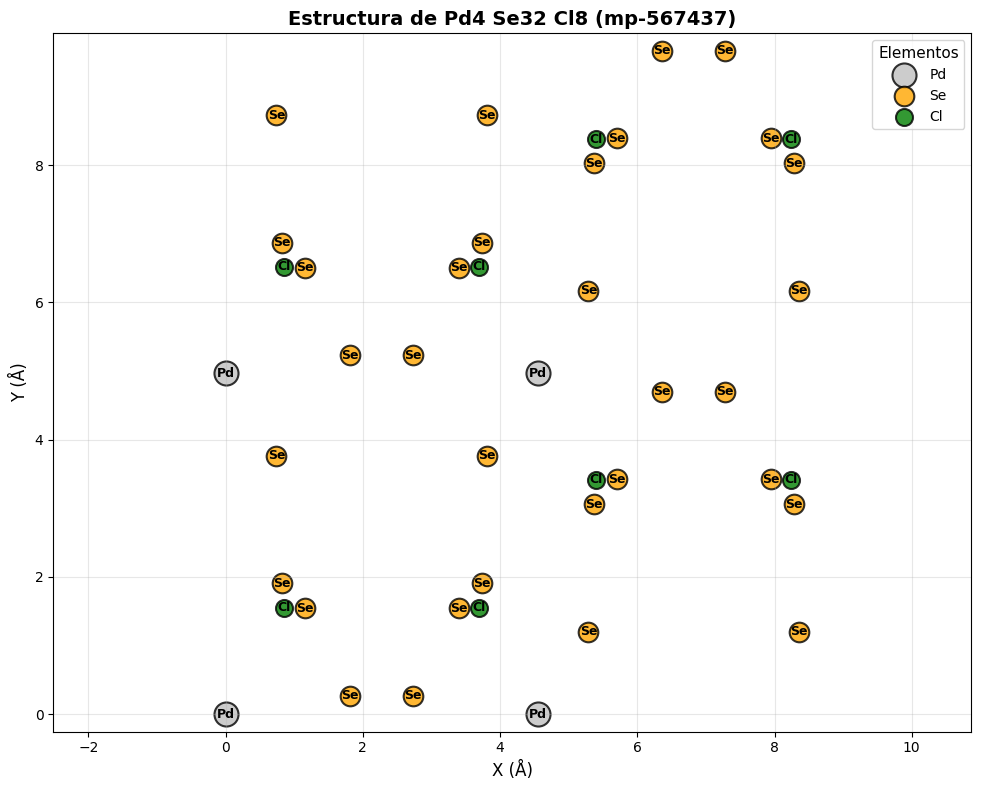


💾 Visualización guardada como: estructura_real_mp-567437.png
💾 Archivo CIF guardado: estructura_real_mp-567437.cif

🔧 Puedes abrir el archivo .cif en:
   • VESTA (gratuito): https://jp-minerals.org/vesta/en/
   • Mercury (gratuito): https://www.ccdc.cam.ac.uk/solutions/software/mercury/
   • Jmol (online): http://jmol.sourceforge.net/


In [13]:
import json
from pymatgen.core import Structure
import matplotlib.pyplot as plt

print("🔍 CARGANDO ESTRUCTURA REAL DE Pd(Se4Cl)2")

try:
    # Cargar datos
    with open('estructuras_materiales.json', 'r') as f:
        estructuras = json.load(f)

    material_id = 'mp-567437'

    if material_id in estructuras and 'structure' in estructuras[material_id]:
        # Cargar estructura
        estructura_real = Structure.from_dict(estructuras[material_id]['structure'])

        print(f"✅ Estructura cargada: {estructura_real.formula}")
        print(f"\n📋 INFORMACIÓN ESTRUCTURAL:")
        print(f"   Fórmula: {estructura_real.formula}")
        print(f"   Material ID: {material_id}")
        print(f"   Número de átomos: {len(estructura_real)}")
        print(f"   Volumen celda: {estructura_real.volume:.2f} Å³")
        print(f"   Densidad: {estructura_real.density:.3f} g/cm³")

        # Parámetros de celda
        a, b, c, alpha, beta, gamma = estructura_real.lattice.parameters
        print(f"   Parámetros de celda:")
        print(f"     a = {a:.3f} Å, b = {b:.3f} Å, c = {c:.3f} Å")
        print(f"     α = {alpha:.1f}°, β = {beta:.1f}°, γ = {gamma:.1f}°")

        # Elementos presentes
        elementos = sorted(set(str(e) for e in estructura_real.species))
        print(f"   Elementos: {', '.join(elementos)}")

        # Contar átomos por elemento
        print(f"\n📊 DISTRIBUCIÓN ATÓMICA:")
        composition = estructura_real.composition
        for element, count in composition.items():
            print(f"   {element}: {int(count)} átomos")

        # Visualizar
        print(f"\n🎨 CREANDO VISUALIZACIÓN...")

        # Crear gráfico simple
        fig, ax = plt.subplots(figsize=(10, 8))

        # Mapeo de colores
        color_map = {
            'Pd': '#C0C0C0',  # Silver
            'Se': '#FFA500',  # Orange
            'Cl': '#008000',  # Green
            'S': '#FFFF00',   # Yellow
            'I': '#800080',   # Purple
            'Te': '#A52A2A',  # Brown
            'Cs': '#FFFF00',  # Yellow
            'Bi': '#FF69B4',  # Pink
        }

        # Proyección XY
        for site in estructura_real:
            element = str(site.specie)
            color = color_map.get(element, '#808080')

            # Tamaño por elemento
            size_map = {'Pd': 300, 'Se': 200, 'Cl': 150}
            size = size_map.get(element, 100)

            ax.scatter(site.coords[0], site.coords[1],
                      s=size, c=color, alpha=0.8,
                      edgecolors='black', linewidth=1.5,
                      label=element if element not in ax.get_legend_handles_labels()[1] else "")

            ax.text(site.coords[0], site.coords[1], element,
                   fontsize=9, ha='center', va='center',
                   fontweight='bold', color='black')

        ax.set_xlabel('X (Å)', fontsize=12)
        ax.set_ylabel('Y (Å)', fontsize=12)
        ax.set_title(f'Estructura de {estructura_real.formula} ({material_id})', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.axis('equal')

        # Leyenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(),
                 title='Elementos', loc='upper right',
                 fontsize=10, title_fontsize=11)

        plt.tight_layout()
        plt.savefig(f'estructura_real_{material_id}.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"\n💾 Visualización guardada como: estructura_real_{material_id}.png")

        # Guardar como CIF para software externo
        estructura_real.to(f"estructura_real_{material_id}.cif", fmt="cif")
        print(f"💾 Archivo CIF guardado: estructura_real_{material_id}.cif")
        print("\n🔧 Puedes abrir el archivo .cif en:")
        print("   • VESTA (gratuito): https://jp-minerals.org/vesta/en/")
        print("   • Mercury (gratuito): https://www.ccdc.cam.ac.uk/solutions/software/mercury/")
        print("   • Jmol (online): http://jmol.sourceforge.net/")

    else:
        print(f"❌ No se encontró estructura para {material_id}")
        print("💡 Asegúrate de haber ejecutado 2_obtener_estructuras.py primero")

except FileNotFoundError:
    print("❌ No se encontró el archivo estructuras_materiales.json")
    print("💡 Ejecuta primero: python 2_obtener_estructuras.py")
except Exception as e:
    print(f"❌ Error: {e}")